In [1]:
import os, shutil, pathlib
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Ручная аугментация на основе 19ти фотографий грани кубика, вращение относительно оси кубика и относительно центра изображения.

In [ ]:
"""
input_folder = '/content/drive/MyDrive/Colab Notebooks/final_d20/2_7_only/train_lite/7/'
    # загрузка списка файлов из папки
files = os.listdir(input_folder)

    # проход по всем файлам в папке
for file in files:
        # загрузка изображения
    img = cv2.imread(input_folder + file)
    (height, width) = img.shape[:2]
    # вращение относительно центра изображения
    #center = (width / 2, height / 2)
    #вращение относительно центра кубика
    center = (863, 617)
    scale = 1.0
    for angle in range(0,360,4):# послдняя цифра градус поворота
        img = cv2.imread(input_folder + file)
        matrix = cv2.getRotationMatrix2D(center, angle, scale)
        rotated_by_matrix = cv2.warpAffine(img, matrix, (width, height))


            # сохранение обработанного изображения
        img = cv2.imwrite(input_folder +str(angle)+"ci"+ file, rotated_by_matrix)


# Создание наборов изображений. Папки для тренировочно валидационного и тестового набора изображений созданы в ручную.

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/final_d20/2_7_only/train_lite',
    image_size=(299, 299),
    color_mode="grayscale",
    batch_size=64)
validation_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/final_d20/2_7_only/validation_lite',
    image_size=(299, 299),
    color_mode="grayscale",
    batch_size=64)
test_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/final_d20/2_7_only/test_lite',
    image_size=(299, 299),
    color_mode="grayscale",
    batch_size=64)

Found 3367 files belonging to 2 classes.
Found 25 files belonging to 2 classes.
Found 15 files belonging to 2 classes.


**Визуализация** примеров тренировочного и валидационного набора данных

In [ ]:
class_names = train_dataset.class_names
print(class_names)

['2', '7']


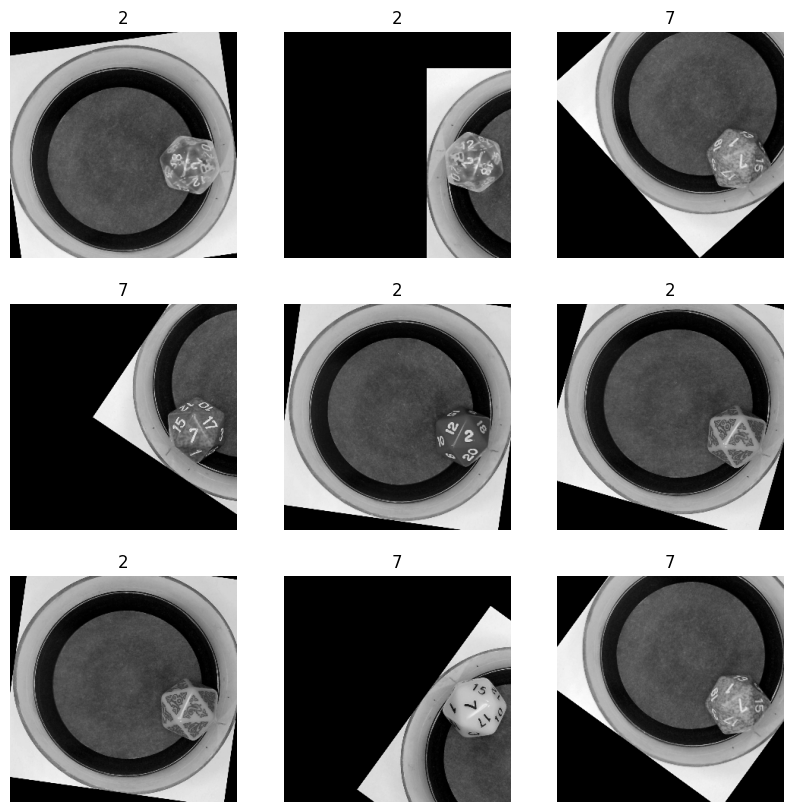

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
class_names = validation_dataset.class_names
print(class_names)

['2', '7']


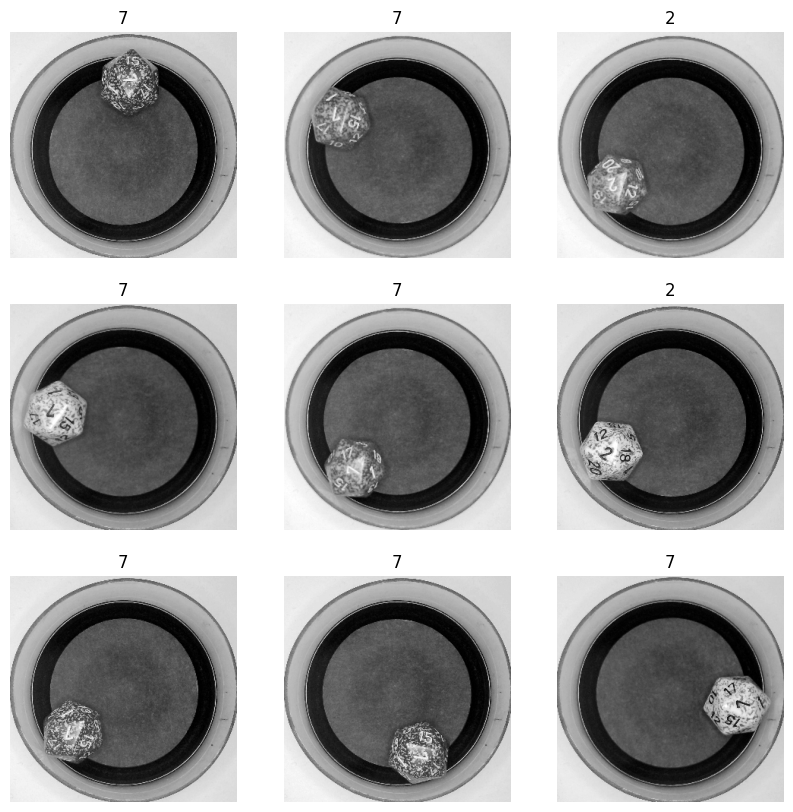

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in validation_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"),cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
class_names = test_dataset.class_names
print(class_names)

['2', '7']


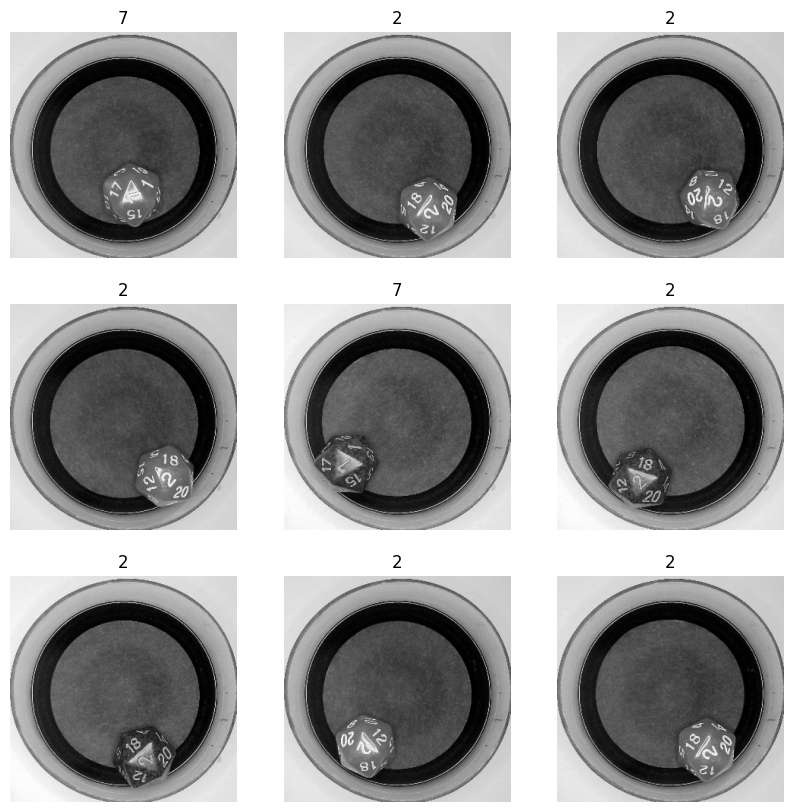

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"),cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

## **Глубокая полносвязная нейронная сеть**

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout # new!

from keras.optimizers import SGD

In [ ]:
inputs = keras.Input(shape=(299, 299, 1))
x = layers.Rescaling(1./255)(inputs)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 299, 299, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 299, 299, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 89401)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │       5,721,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,730,881 (21.86 MB)

 Trainable params: 5,730,497 (21.86 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs = 100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 373ms/step - accuracy: 0.6124 - loss: 0.6537 - val_accuracy: 0.3846 - val_loss: 0.7488
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 351ms/step - accuracy: 0.6326 - loss: 0.6357 - val_accuracy: 0.5000 - val_loss: 0.7110
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 363ms/step - accuracy: 0.6328 - loss: 0.6351 - val_accuracy: 0.5769 - val_loss: 0.6966
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 331ms/step - accuracy: 0.6416 - loss: 0.6213 - val_accuracy: 0.5769 - val_loss: 0.6907
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 334ms/step - accuracy: 0.6356 - loss: 0.6313 - val_accuracy: 0.5769 - val_loss: 0.6911
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.6733 - loss: 0.5974 - val_accuracy: 0.5769 - val_loss: 0.7035
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 366ms/step - accuracy: 0.6736 - loss: 0.5902 - val_accuracy: 0.5000 - val_loss: 0.7149
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 348ms/step - accuracy: 0.6799 - loss: 0.6034 - 

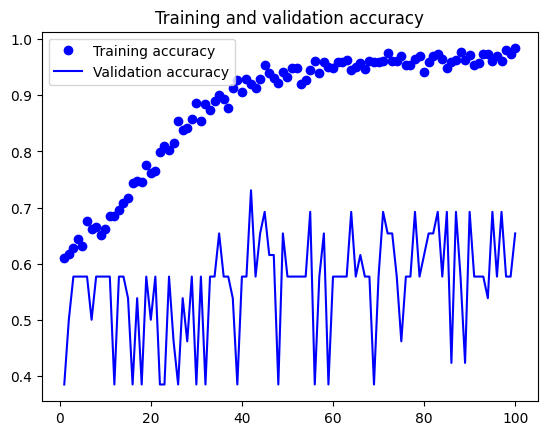

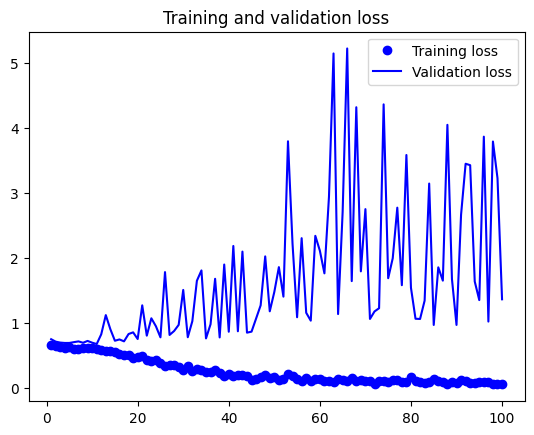

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Простая сверточная с прореживанием данных


In [4]:

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(299, 299, 1))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 299, 299, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 299, 299, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 299, 299, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 38, 38, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 38, 38, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 19, 19, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 19, 19, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          51,201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,979,009 (15.18 MB)

 Trainable params: 3,979,009 (15.18 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [7]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs = 20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 520s 9s/step - accuracy: 0.4990 - loss: 0.6944 - val_accuracy: 0.3600 - val_loss: 0.7015
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 375ms/step - accuracy: 0.5107 - loss: 0.6935 - val_accuracy: 0.4800 - val_loss: 0.6933
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 404ms/step - accuracy: 0.5087 - loss: 0.6946 - val_accuracy: 0.3600 - val_loss: 0.6941
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 403ms/step - accuracy: 0.4918 - loss: 0.6927 - val_accuracy: 0.6000 - val_loss: 0.6890
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 399ms/step - accuracy: 0.5478 - loss: 0.6824 - val_accuracy: 0.6000 - val_loss: 0.6939
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 407ms/step - accuracy: 0.5895 - loss: 0.6547 - val_accuracy: 0.6400 - val_loss: 0.6884
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 375ms/step - accuracy: 0.6661 - loss: 0.5615 - val_accuracy: 0.4000 - val_loss: 0.7163
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - accuracy: 0.7419 - loss: 0.5076 - val_accura

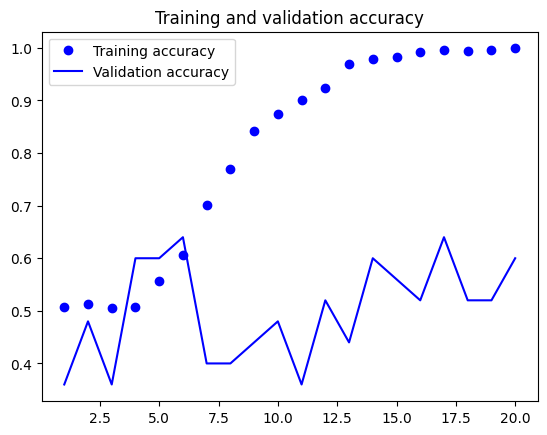

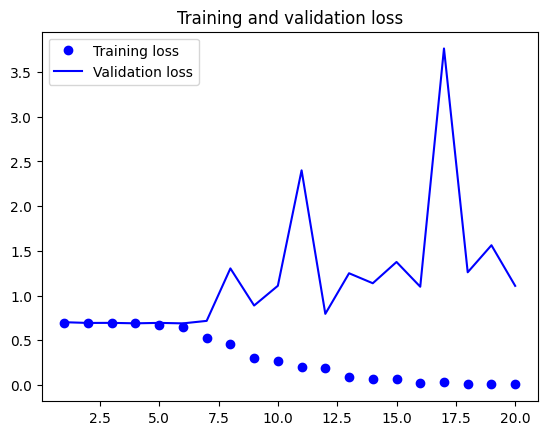

In [8]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

##Мини-модель с архитектурой Xception с применением пакетной нормализации, остаточных связей и раздельной свертки по глубине.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(299, 299, 1))

x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = layers.Conv2D(
        size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [11]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 299, 299, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 299, 299, 1)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 295, 295, 32)   │            800 │ rescaling_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 295, 295, 32)   │            128 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 295, 295, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 295, 295, 32)   │          1,312 │ activation[0][0]       │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 295, 295, 32)   │            128 │ separable_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 295, 295, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 295, 295, 32)   │          1,312 │ activation_1[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 148, 148, 32)   │              0 │ separable_conv2d_1[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 148, 148, 32)   │          1,024 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 148, 148, 32)   │              0 │ max_pooling2d_5[0][0], │
│                           │                        │                │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 148, 148, 32)   │            128 │ add[0][0]              │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 148, 148, 32)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_2        │ (None, 148, 148, 64)   │          2,336 │ activation_2[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 720,257 (2.75 MB)

 Trainable params: 717,249 (2.74 MB)

 Non-trainable params: 3,008 (11.75 KB)

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.5125 - loss: 0.7079 - val_accuracy: 0.6400 - val_loss: 0.6915
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 508ms/step - accuracy: 0.5462 - loss: 0.6830 - val_accuracy: 0.6400 - val_loss: 0.6896
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 500ms/step - accuracy: 0.6043 - loss: 0.6473 - val_accuracy: 0.3600 - val_loss: 0.7001
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 517ms/step - accuracy: 0.6982 - loss: 0.5452 - val_accuracy: 0.3600 - val_loss: 0.7334
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 496ms/step - accuracy: 0.8594 - loss: 0.3058 - val_accuracy: 0.6400 - val_loss: 0.6600
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 517ms/step - accuracy: 0.9062 - loss: 0.1866 - val_accuracy: 0.6400 - val_loss: 0.6553
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 497ms/step - accuracy: 0.9231 - loss: 0.1723 - val_accuracy: 0.6400 - val_loss: 0.6811
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 513ms/step - accuracy: 0.9664 - loss: 0.0862 - val_accura

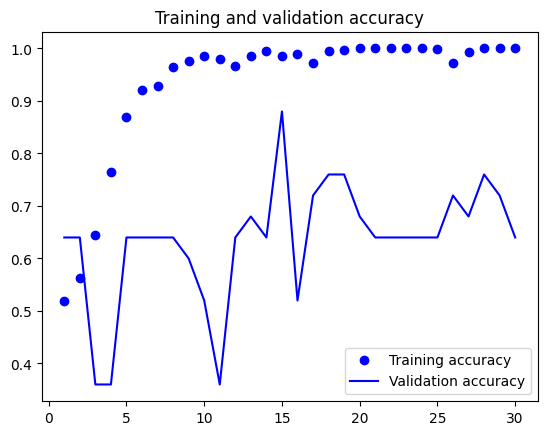

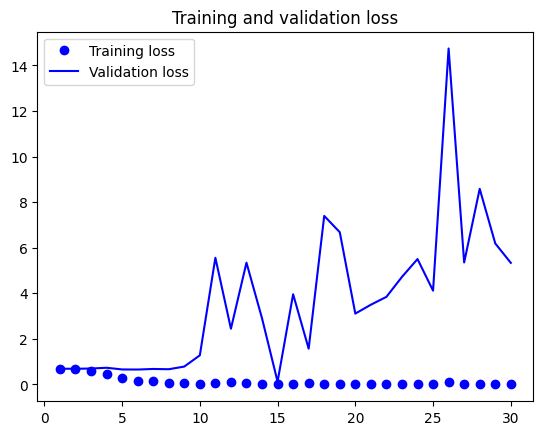

In [13]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Проверка на валидационных и тестовых изображениях

In [15]:
test_validation_model = keras.models.load_model(
 "convnet_from_scratch.keras")
test_loss, test_acc = test_validation_model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8800 - loss: 0.1235
Test accuracy: 0.880


In [16]:
test_model = keras.models.load_model(
 "convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8667 - loss: 0.2342
Test accuracy: 0.867




## **Xception**

In [ ]:
model = keras.applications.Xception(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(299, 299, 1),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
    name="xception",
)
model = keras.Model(inputs=model.input, outputs=model.outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            288 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 20,865,002 (79.59 MB)

 Trainable params: 20,810,474 (79.39 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.5356 - loss: 0.7891 - val_accuracy: 0.6154 - val_loss: 0.6892
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6608 - loss: 0.6027 - val_accuracy: 0.6154 - val_loss: 0.6873
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7762 - loss: 0.4264 - val_accuracy: 0.6154 - val_loss: 0.6843
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8337 - loss: 0.3387 - val_accuracy: 0.6154 - val_loss: 0.6867
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8840 - loss: 0.2399 - val_accuracy: 0.6154 - val_loss: 0.6814
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8886 - loss: 0.2291 - val_accuracy: 0.6154 - val_loss: 0.6773
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9267 - loss: 0.1664 - val_accuracy: 0.6154 - val_loss: 0.6678
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9450 - loss: 0.1397 - val_accuracy: 0.6154 - val

Формирование графиков изменения потерь и точности
в процессе обучения

# Проверка на валидационных и тестовых изображениях

In [ ]:
test_validation_model = keras.models.load_model(
 "/content/drive/MyDrive/Colab Notebooks/final_d20/2_7_only/train_lite/convnet_from_scratch.keras")
test_loss, test_acc = test_validation_model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 92s 92s/step - accuracy: 0.9600 - loss: 0.1028
Test accuracy: 0.960


In [ ]:
test_model = keras.models.load_model(
 "/content/drive/MyDrive/Colab Notebooks/final_d20/2_7_only/train_lite/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 60s 60s/step - accuracy: 1.0000 - loss: 3.3746e-05
Test accuracy: 1.000


## Демонстрация тестовых изображений с вероятностями для поиска "сложных" кубиков


In [ ]:
input_folder = '/content/drive/MyDrive/Colab Notebooks/final_d20/2_7_only/all_test/'
    # загрузка списка файлов из папки
files = os.listdir(input_folder)
def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        input_folder + img_path,color_mode='grayscale', target_size=target_size)
    array = keras.utils.img_to_array(img)
    #array = np.expand_dims(array, axis=0)
    return array
img_array = x = np.array([np.array(get_img_array(img_path, target_size=(299, 299))) for img_path in files])


In [ ]:
img_array.shape

(15, 299, 299, 1)

In [ ]:
predictions = test_model.predict(img_array, batch_size=None, verbose="auto", steps=None, callbacks=None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 57s 57s/step


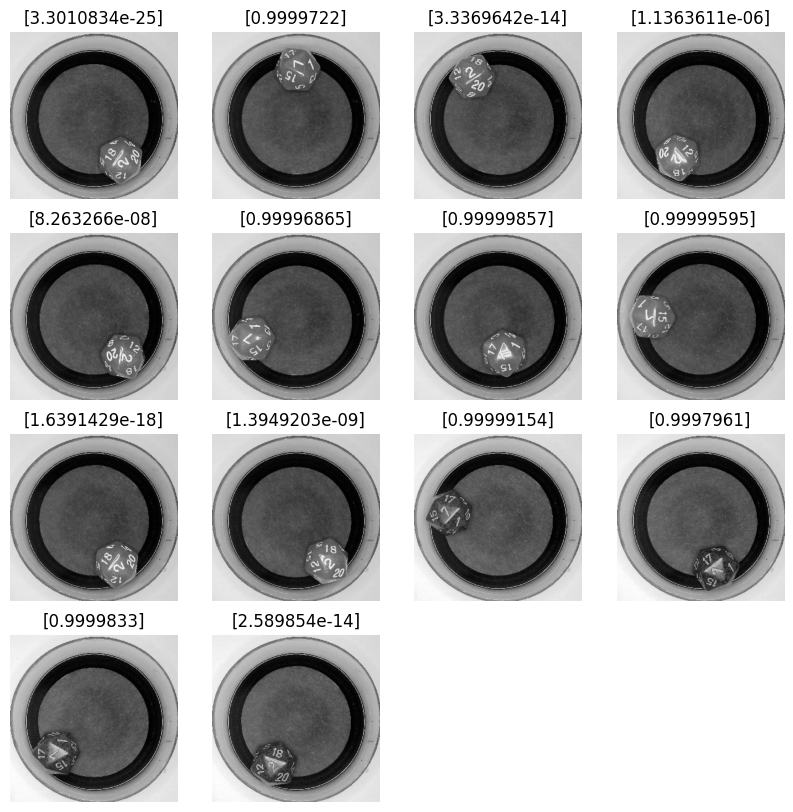

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(14):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(img_array[i],cmap="gray")
    plt.title(predictions[i])
    #plt.title(class_names[labels[i]])
    plt.axis("off")

# Диаграмма бросков на основе тестового набора данных

In [ ]:
throw_dice_list = []
for i in predictions:
  if i > 0.99:
    throw_dice_list.append(7)
  elif i < 0.001:
    throw_dice_list.append(2)
print(len(predictions))
print(len(throw_dice_list))
print(throw_dice_list)

15
15
[2, 7, 2, 2, 2, 7, 7, 7, 2, 2, 7, 7, 7, 2, 2]


In [ ]:
all_trow = [0]*20
for i in range(1,len(all_trow)):
    for n in throw_dice_list:
      if n == i+1:
        all_trow[i] = all_trow[i] + 1
print(all_trow)

[0, 8, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Перевод в df  и сохранение в exel

In [ ]:
import pandas as pd

# Создаём датафрейм
x=list(range(1, 21))
data = {'Грани': x, 'Броски': all_trow}
df = pd.DataFrame(data)

# Сохраняем данные в файл Excel
df.to_excel('/content/drive/MyDrive/Colab Notebooks/final_d20/2_7_only/test.xlsx', index=False)


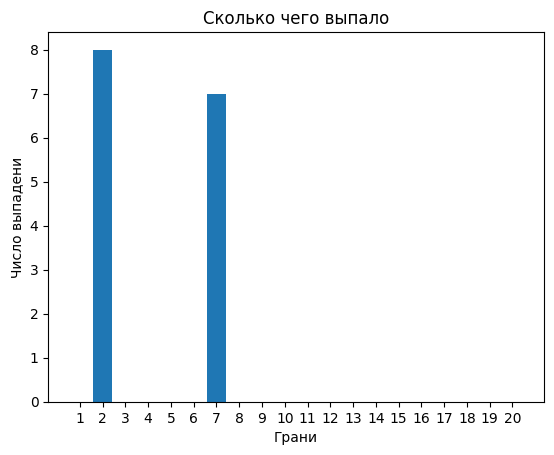

In [ ]:
import matplotlib.pyplot as plt

x=list(range(1, 21))

# giving the values against
# each value at x axis
y=all_trow
plt.bar(x, y)

# setting x-label as pen sold
plt.xlabel("Грани")

# setting y_label as price
plt.ylabel("Число выпадений")
plt.title("Сколько чего выпало")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

# Визуализация карт активации

In [ ]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/final_d20/2_7_only/train_lite/convnet_from_scratch.keras")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            288 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 41,671,380 (158.96 MB)

 Trainable params: 20,808,425 (79.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 20,808,427 (79.38 MB)

In [ ]:
img_path = "/content/drive/MyDrive/Colab Notebooks/final_d20/2_7_only/test_lite/2/29_93.jpg"

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path,color_mode='grayscale', target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(299, 299))

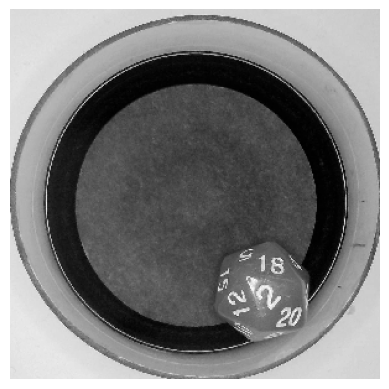

In [ ]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"),cmap="gray")
plt.show()

In [ ]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 149, 149, 32)


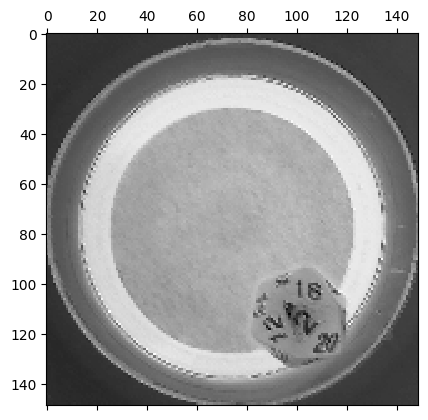

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 5],cmap="gray")

In [ ]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                             images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="gray")

Output hidden; open in https://colab.research.google.com to view.